### Problem Statement:

#### Predict the Burned Area of Forest Fire with Neural Networks.

In [1]:
#Import libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
#IMport Dataset
forestfire=pd.read_csv(r'E:\DS Assigment\Neural Networks/forestfires.csv')
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
fire_data = forestfire.drop(forestfire.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1)
fire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


#### About the Dataset

month : Month of the year: 'jan' to 'dec'

day : Day of the week: 'mon' to 'sun'

FFMC : Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20

DMC : Duff Moisture Code index from the FWI system: 1.1 to 291.3

DC : Drought Code index from the FWI system: 7.9 to 860.6

ISI : Initial Spread Index from the FWI system: 0.0 to 56.10

temp : Temperature in Celsius degrees: 2.2 to 33.30

RH : Relative humidity in percentage: 15.0 to 100

wind : Wind speed in km/h: 0.40 to 9.40

rain : Outside rain in mm/m2 : 0.0 to 6.4

area : The burned area of the forest (in ha): 0.00 to 1090.84

#### Data Exploration

In [4]:
fire_data.shape

(517, 12)

In [5]:
fire_data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [6]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [7]:
#Missing value
fire_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [8]:
#Duplicate values
fire_data[fire_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [9]:
#Types of variables
# List of Numerical Variables
numerical_features = [feature for feature in fire_data.columns if fire_data[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
fire_data[numerical_features].head()

Number of numerical variables: 9


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [10]:
discrete_feature = [feature for feature in numerical_features if len(fire_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 2


In [11]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [12]:
#Categorical Variables
categorical = [var for var in fire_data.columns if fire_data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


#### Frequency counts of categorical variables

In [13]:
for var in categorical: 
    
    print(fire_data[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [14]:
for var in categorical: 
    
    print(fire_data[var].value_counts()/np.float(len(fire_data)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


#### Number of labels: Cardinality

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [15]:
for var in categorical:
    
    print(var, ' contains ', len(fire_data[var].unique()), ' labels')


month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [16]:
fire_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


#### Data Visualization

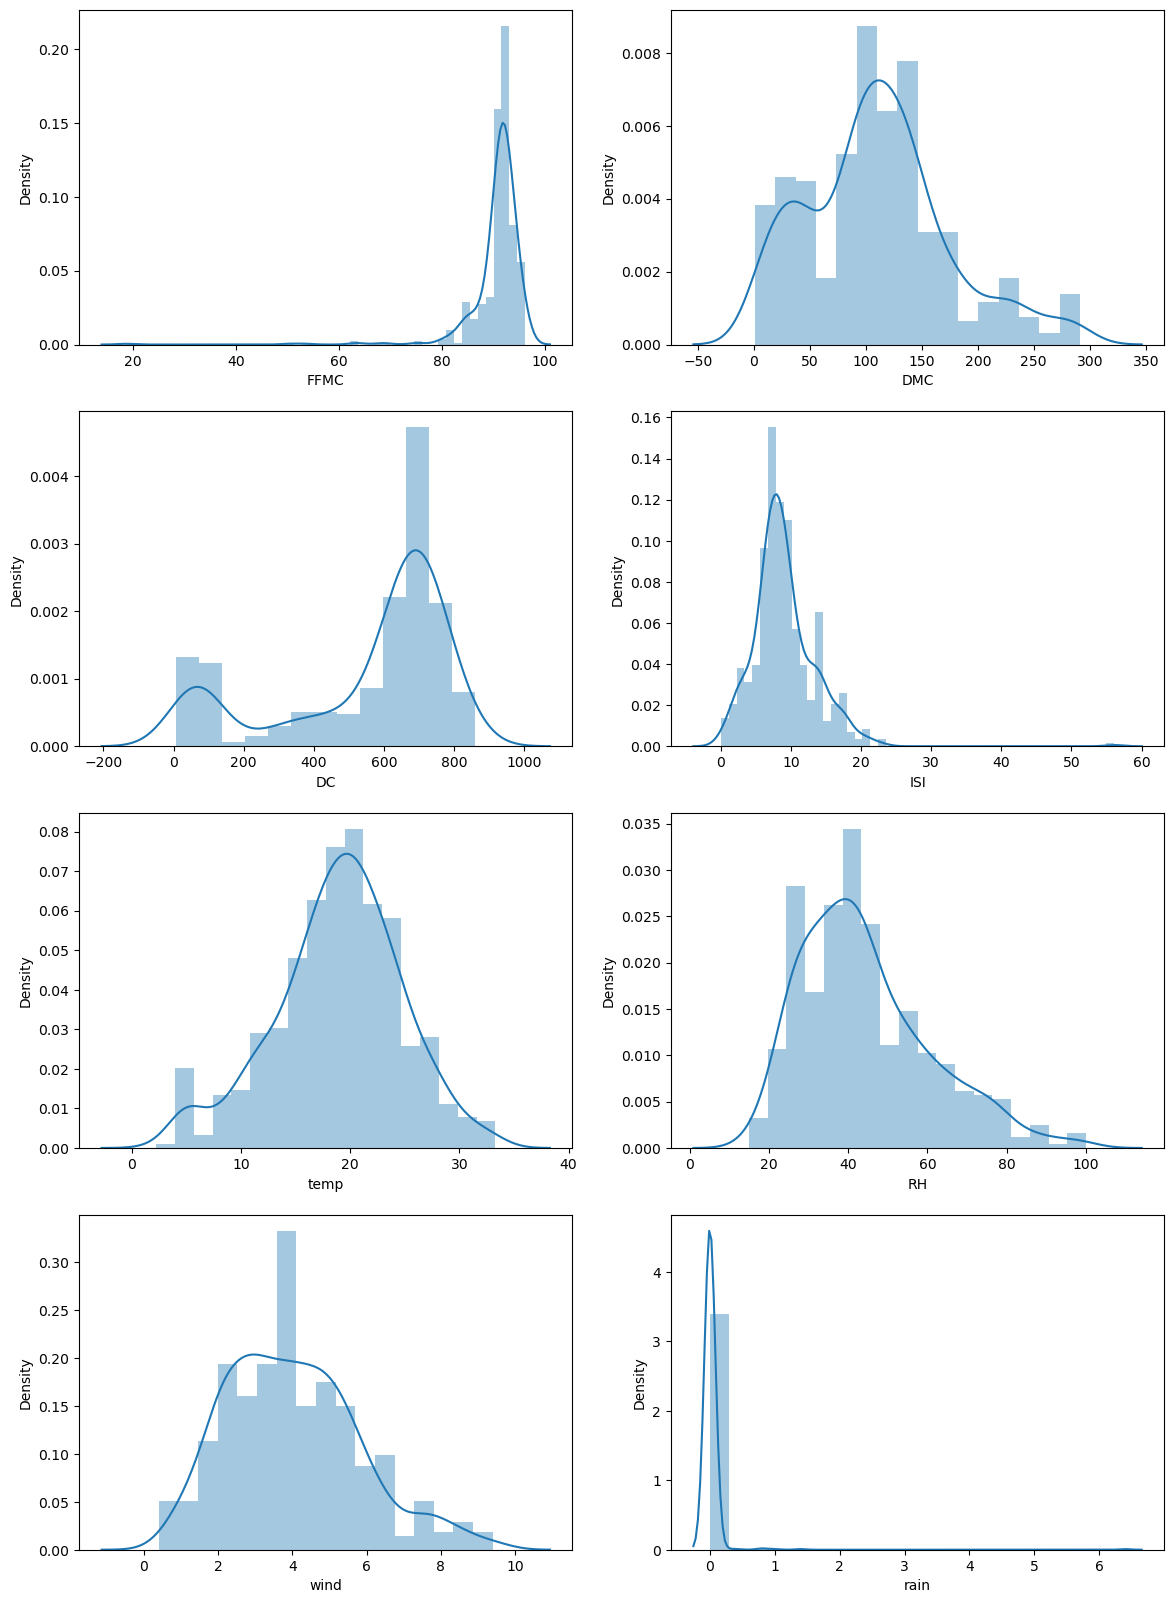

In [17]:
fig, ax = plt.subplots(4,2, figsize = (14,20))

sns.distplot(fire_data.FFMC, ax = ax[0,0])
sns.distplot(fire_data.DMC, ax = ax[0,1])
sns.distplot(fire_data.DC, ax = ax[1,0])
sns.distplot(fire_data.ISI, ax = ax[1,1])
sns.distplot(fire_data.temp, ax = ax[2,0])
sns.distplot(fire_data.RH, ax = ax[2,1])
sns.distplot(fire_data.wind, ax = ax[3,0])
sns.distplot(fire_data.rain, ax = ax[3,1])

plt.show()

#### Outlier Detection

In [18]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col],25)    # 1st quartile (25%)
        Q3 = np.percentile(df[col],75)    # 3rd quartile (75%)
        IQR = Q3 - Q1                     # Interquartile rrange (IQR)
        
        outlier_step = 1.5 * IQR          # outlier step
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(forestfire[continuous_feature]))))

The dataset contains 3 observations with more than 2 outliers


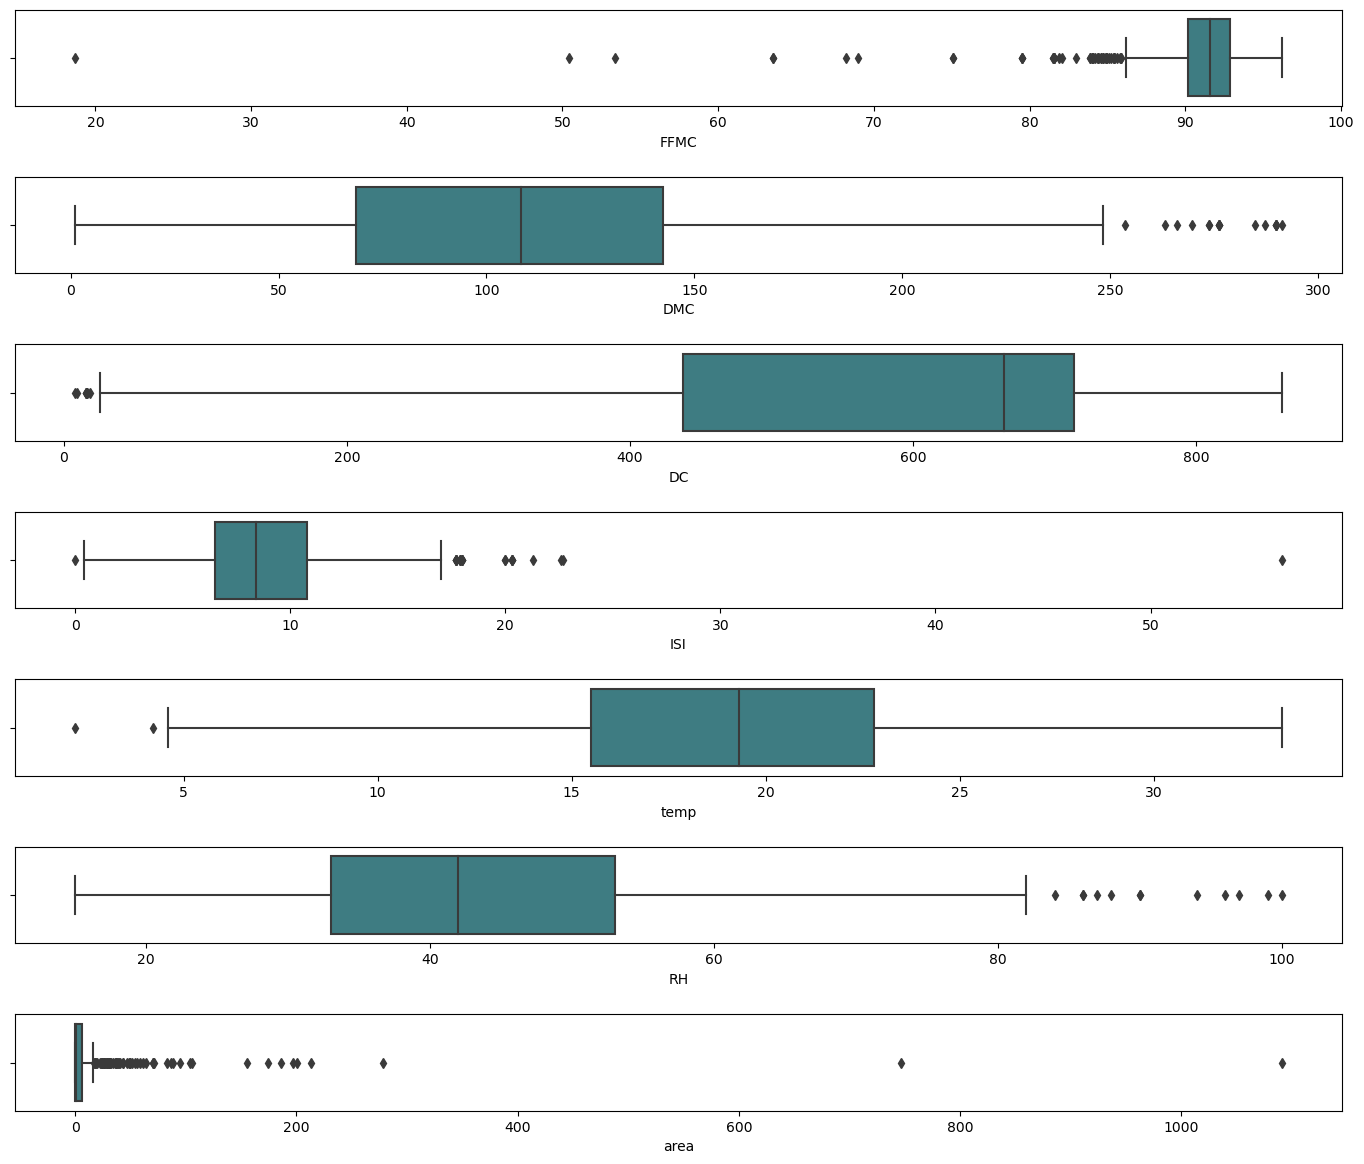

In [19]:
outlier = fire_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

#### Observation:

There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building.

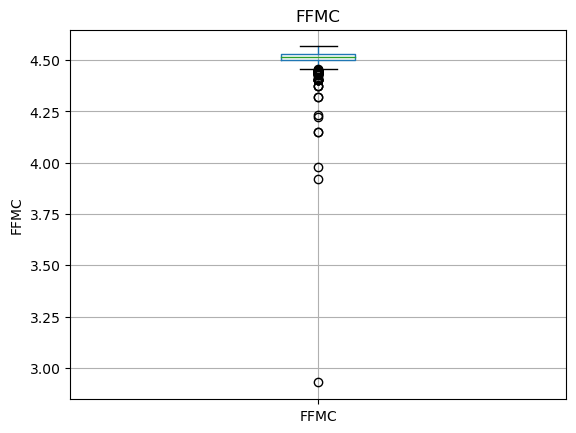

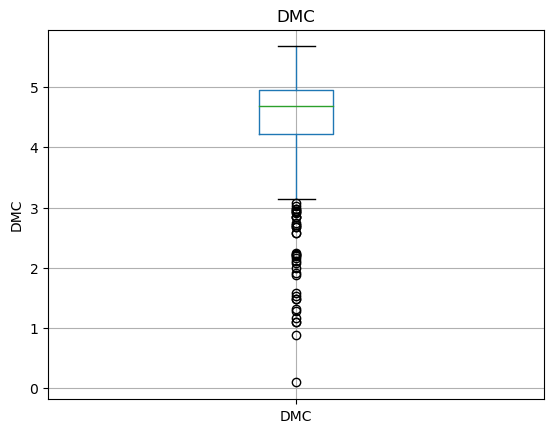

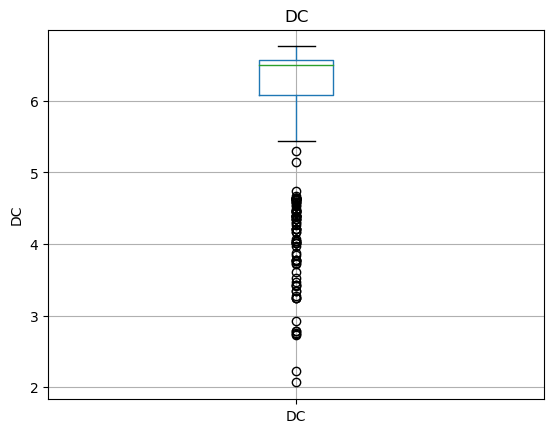

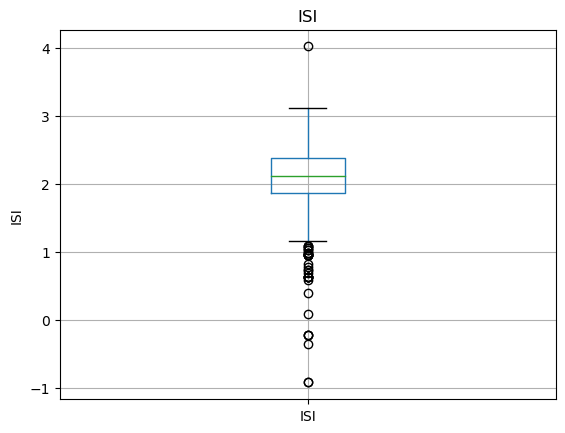

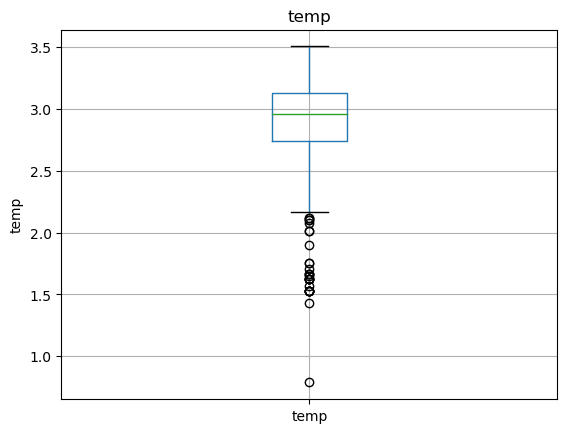

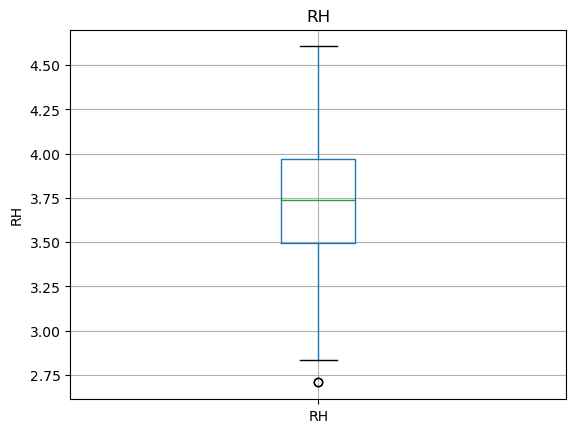

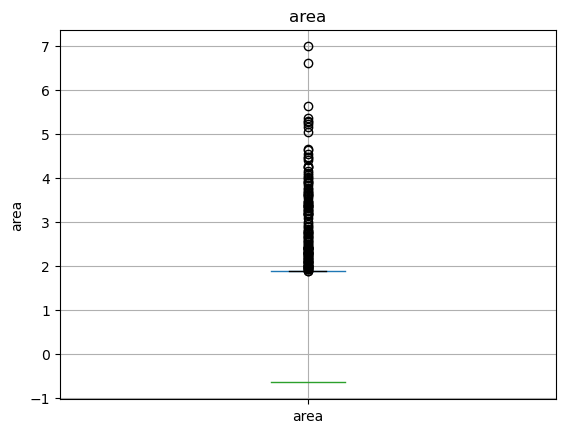

In [20]:
#After log-Transformation
for feature in continuous_feature:
    data = fire_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### Visualize the distribution of 'Area'

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


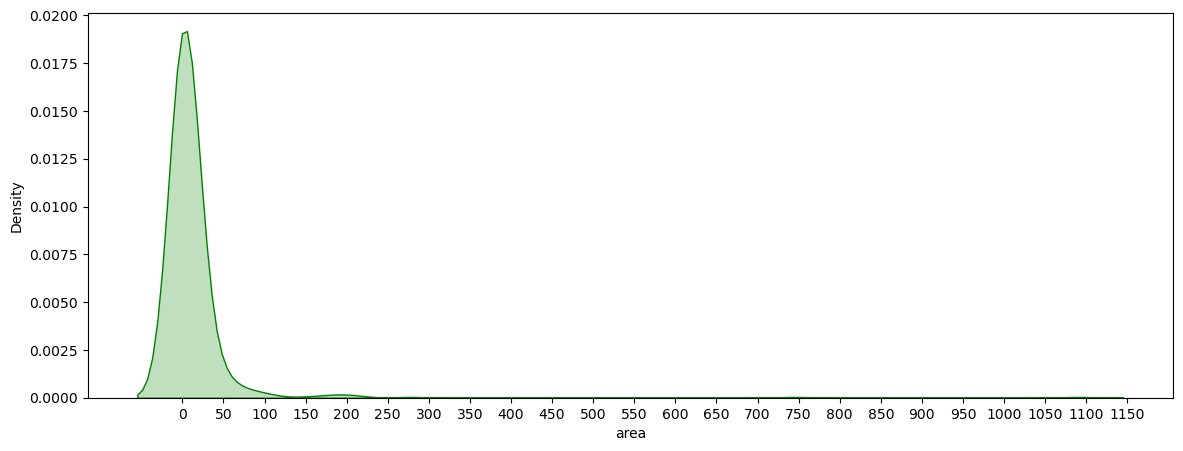

In [21]:
plt.figure(figsize=(14,5))
print("Skew: {}".format(fire_data['area'].skew()))
print("Kurtosis: {}".format(fire_data['area'].kurtosis()))
ax = sns.kdeplot(fire_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [22]:
#Categorical Variables
categorical_features=[feature for feature in fire_data.columns if fire_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
forestfire[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [23]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(fire_data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [24]:
for feature in fire_data.columns:
    if fire_data[feature].dtypes == 'object':      # in pandas it is object
        unique_cat = len(fire_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(fire_data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



#### Analyzing categorical columns

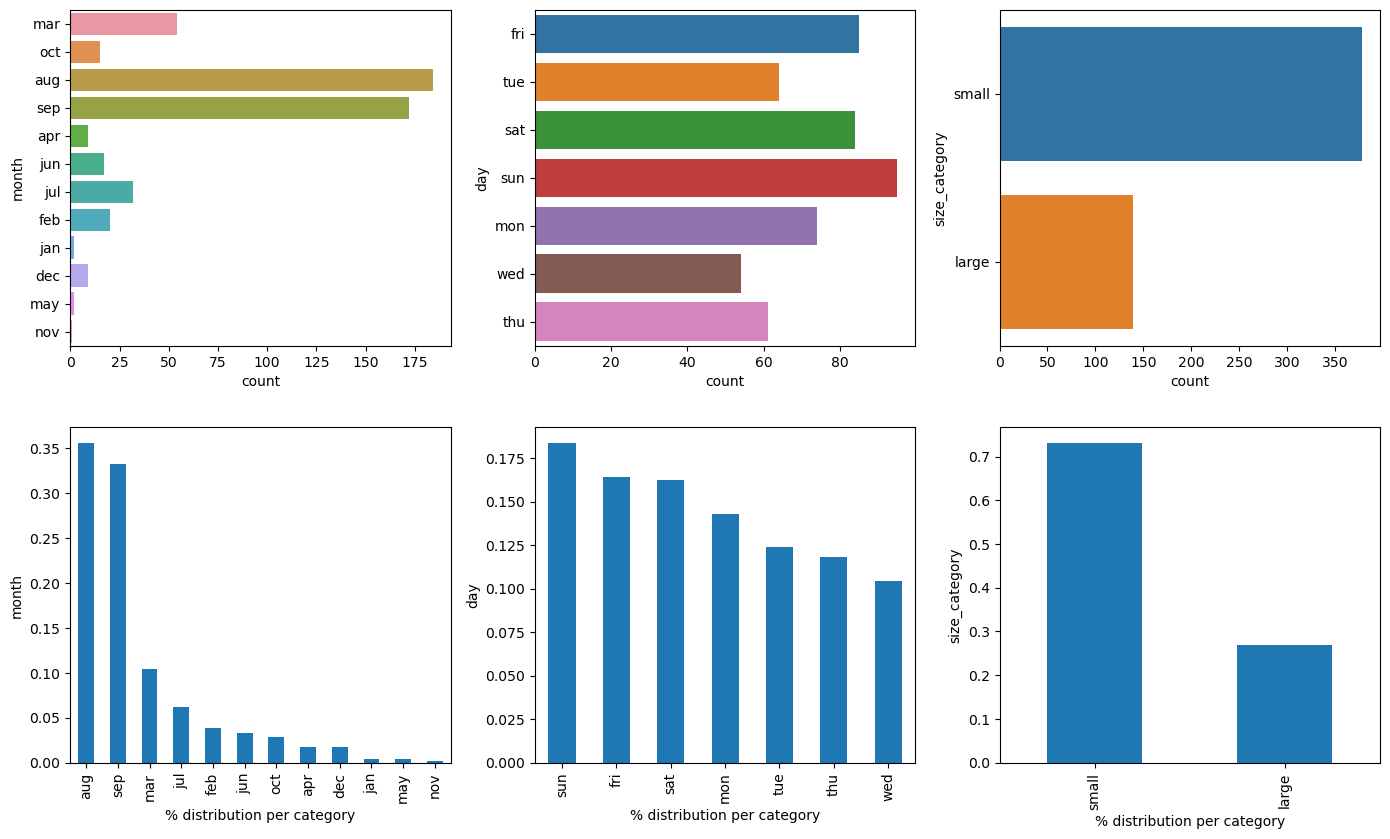

In [25]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data = fire_data,y=col)
    plt.subplot(3,3,i+3)
    fire_data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

It is interesting to see that abnormally high number of the forest fires occur in the month of August and September.



In the case of day, the days from Friday to Monday have higher equal proportion of cases. (However, no strong indicators)May be because of the weekend animal throw some kind of cool party and other activities.

#### Analyzing the relationship of categorical features with respect to the Target feature

In [26]:
print(fire_data['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high

df = fire_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No damage


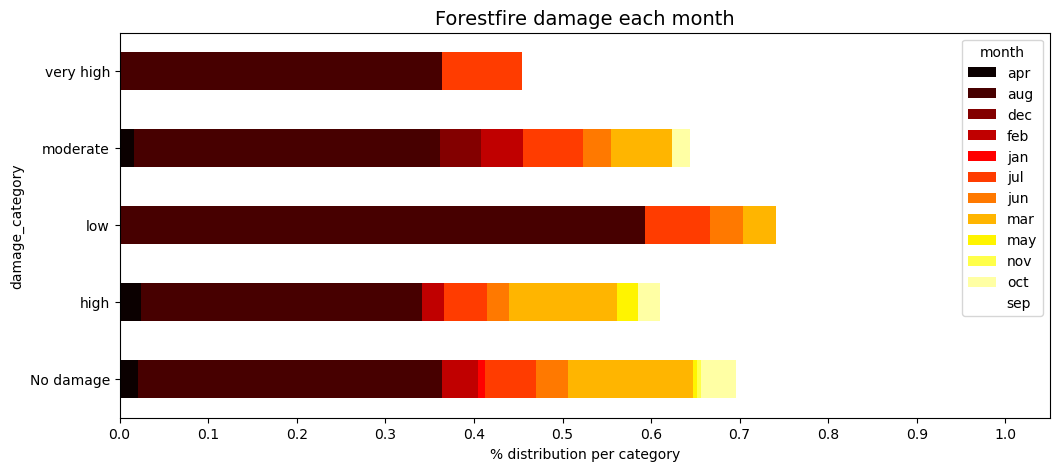

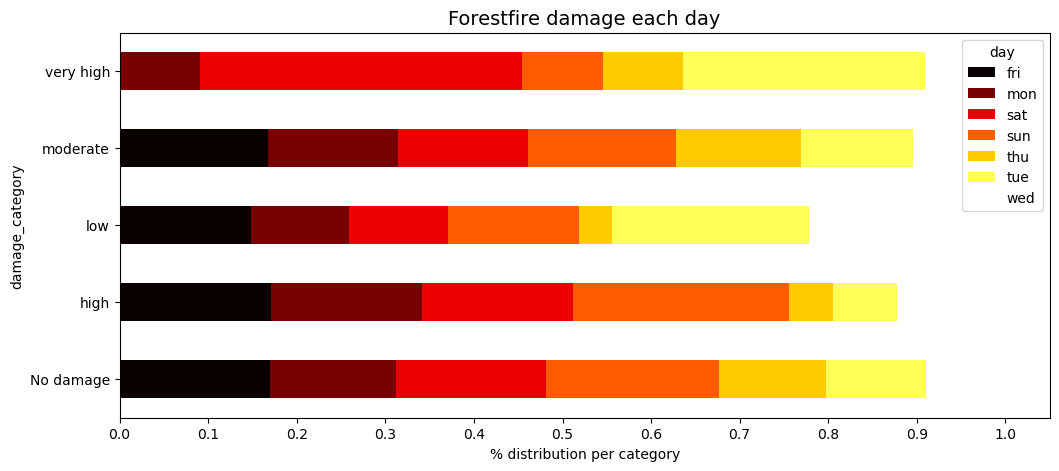

In [27]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,cmap='hot',figsize=(12,5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col), fontsize=14)
        
plt.show()

Previously we had observed that August and September had the most number of forest fires. And from the above plot of month, we can understand few things.

Most of the fires in August were low (< 1 hectare).

The very high damages(>100 hectares) happened in only 3 months - august,jan and september.

Regarding fire damage per day, nothing much can be observed. Except that, there were no very high damaging fires on Friday and on Saturdays it has been reported most.

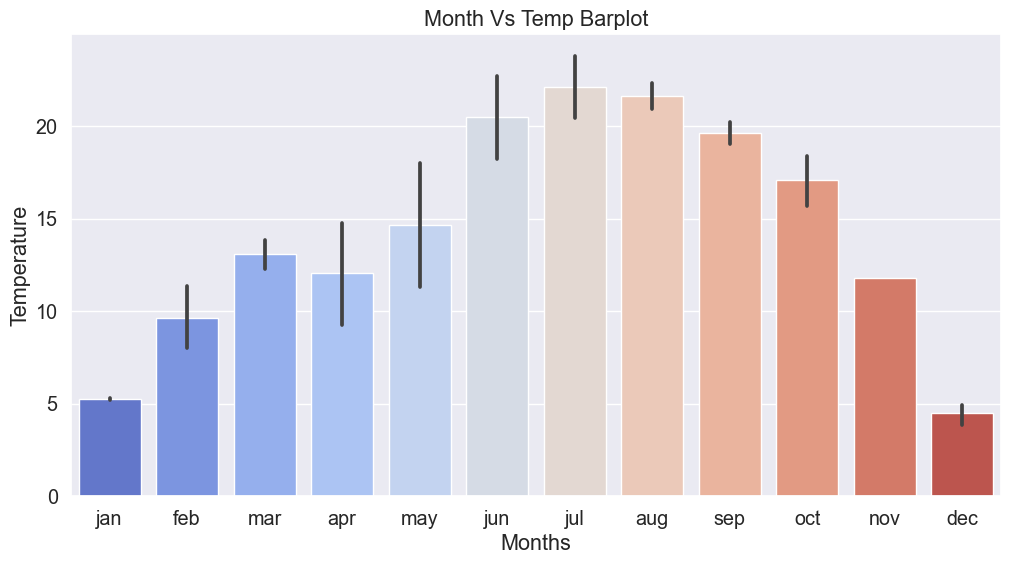

In [28]:
plt.rcParams['figure.figsize'] = [12,6]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = fire_data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm')
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

#### Monthly analysis of burnt area, where the condition is: area>0

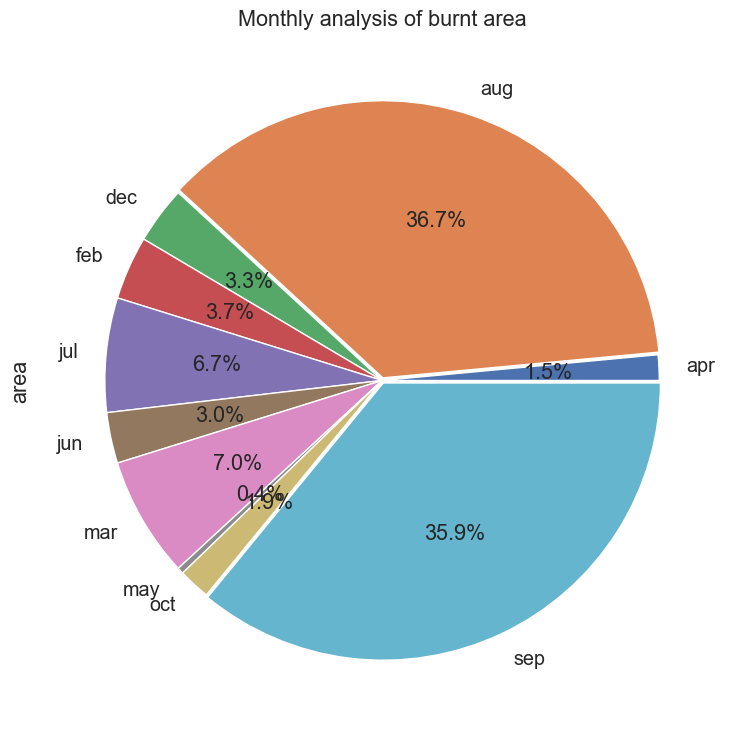

In [29]:
areaburnt = fire_data[fire_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.01,0,0,0,0,0,0,0,0.01],autopct='%0.1f%%')
plt.show()

As we can see from the above pie chart,the month of aug and sep have recorded highest % of forest fire i.e 36.8% & 36.1% respectively.

Month that recorded least forest fire is may with 0.4%.


In [30]:
df1 = fire_data.copy()
order = {'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1 = df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

,% Small Forest Fire,% Large Forest Fire
January,100.000000,0.000000
February,70.000000,30.000000
March,77.777778,22.222222
April,77.777778,22.222222
May,50.000000,50.000000
June,82.352941,17.647059
July,71.875000,28.125000
August,76.630435,23.369565
September,70.348837,29.651163
October,73.333333,26.666667


#### Change 'month' from words to numbers for easier analysis

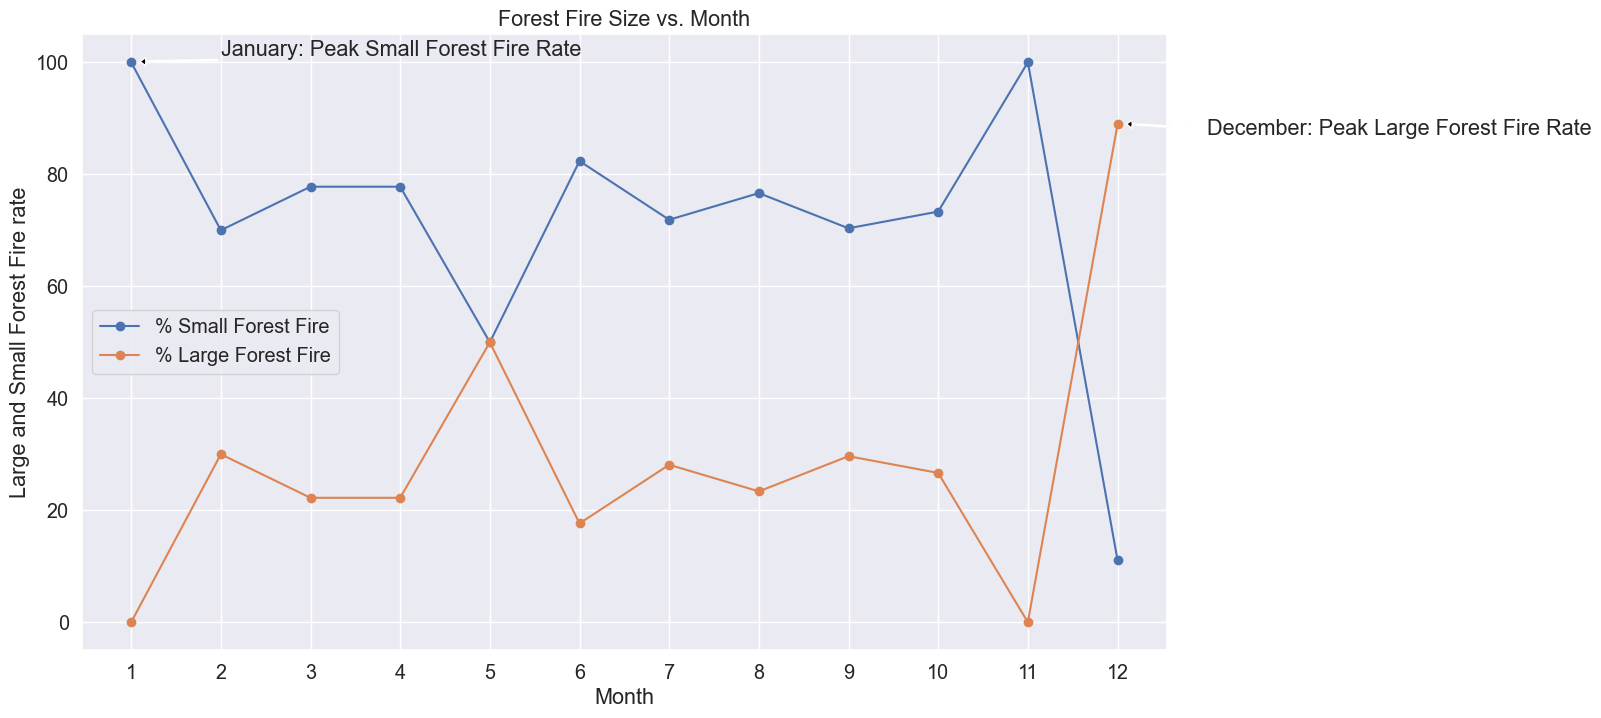

In [31]:
df1 = fire_data.copy()
order = {'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1 = df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line', figsize = (14,8), marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()


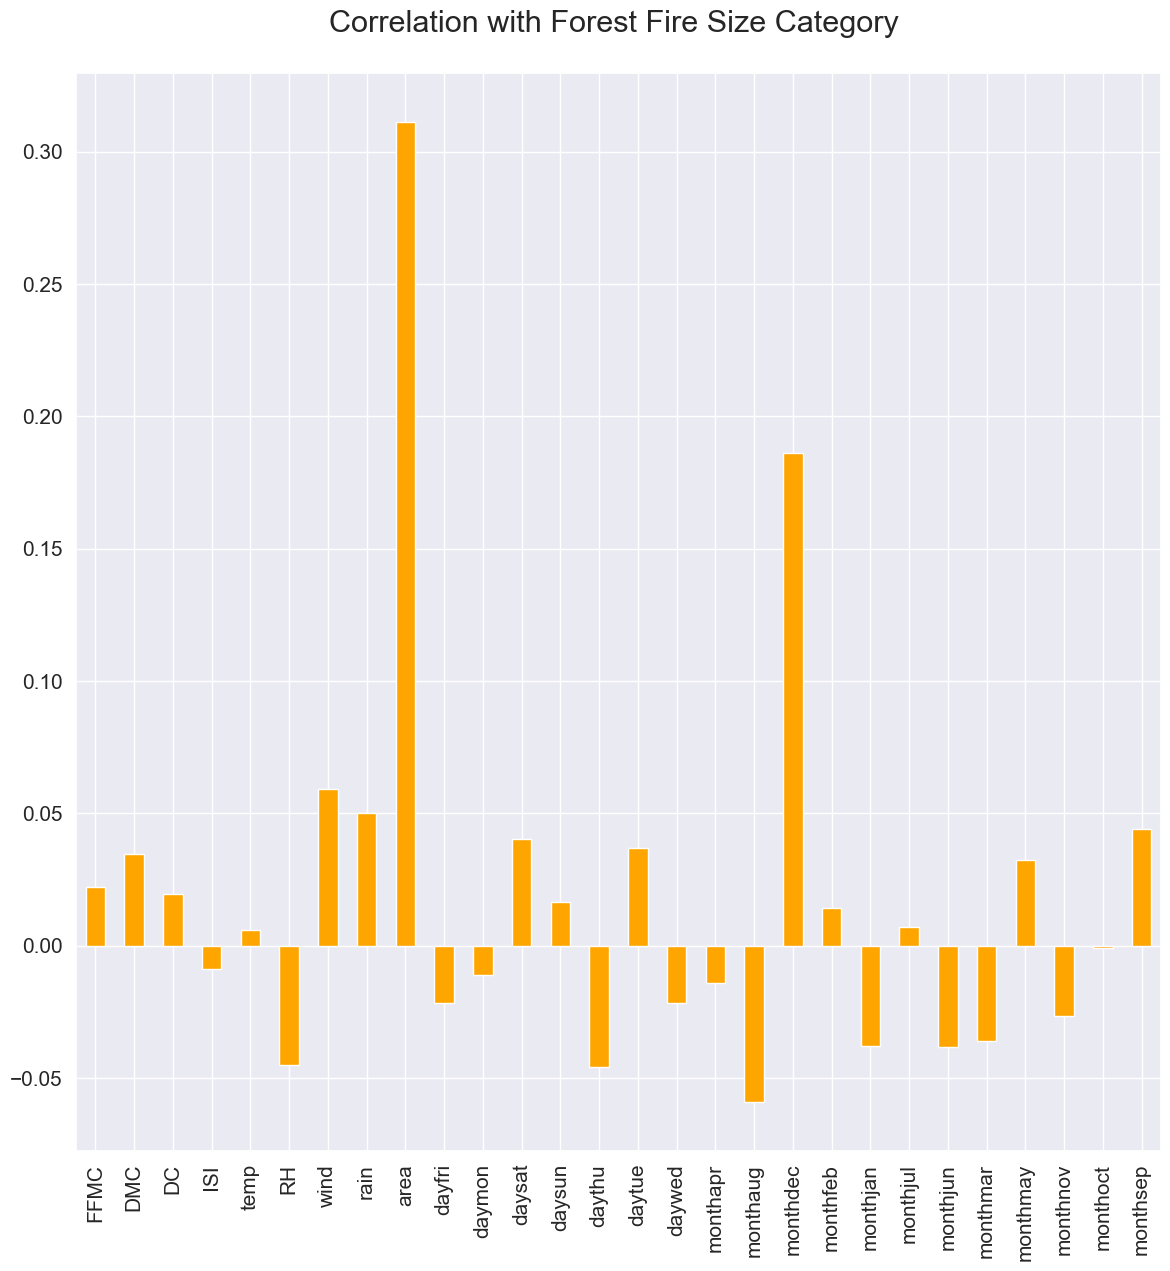

In [32]:
df = fire_data.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = forestfire.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize= (14,14), fontsize = 15, color = 'orange', rot = 90, grid = True)
plt.title('Correlation with Forest Fire Size Category \n', horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif");

#### Analysis of the response column

In [33]:
fire_data.size_category.unique()

array(['small', 'large'], dtype=object)

#### Checking for Imbalanced or balanced dataset with regards to the Target

In [34]:
countsizesmall = len(fire_data[fire_data.size_category == 'small'])
countsizelarge = len(fire_data[fire_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(fire_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(fire_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


In [35]:
fire_data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

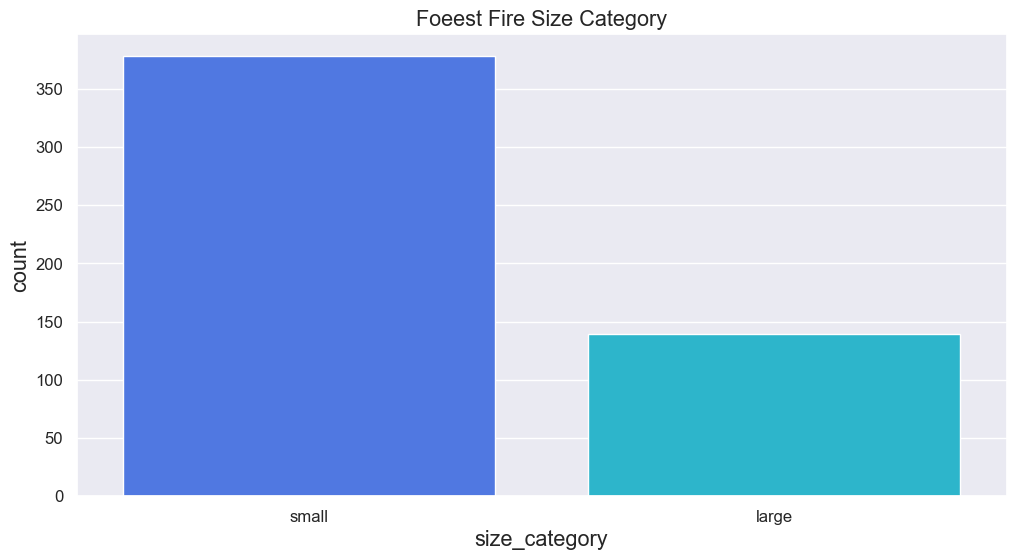

In [36]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data= fire_data, palette = pal, order= fire_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Foeest Fire Size Category');

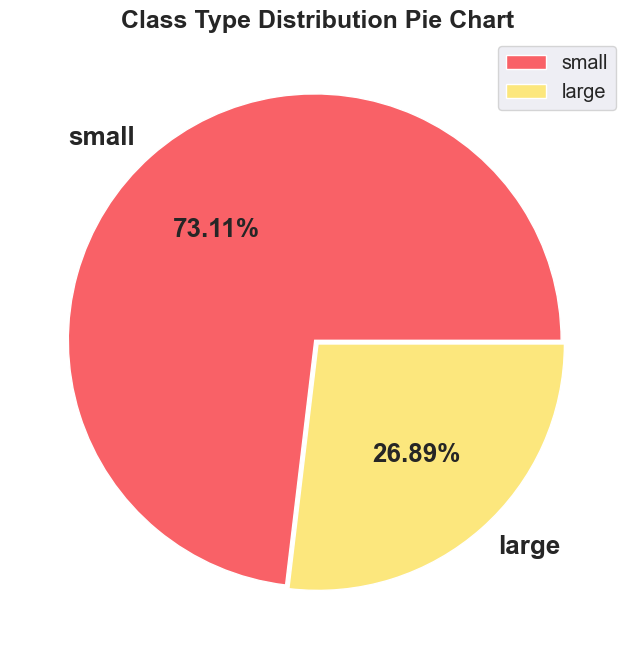

In [37]:
plt.figure(figsize = (8,8))
plt.pie(fire_data['size_category'].value_counts(), labels= fire_data.size_category.unique(),
        explode = [0.02,0.0], autopct= '%.2f%%', colors = ["#F96167", "#FCE77D"],
        textprops = {'size':'large', 'fontweight':'bold',})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

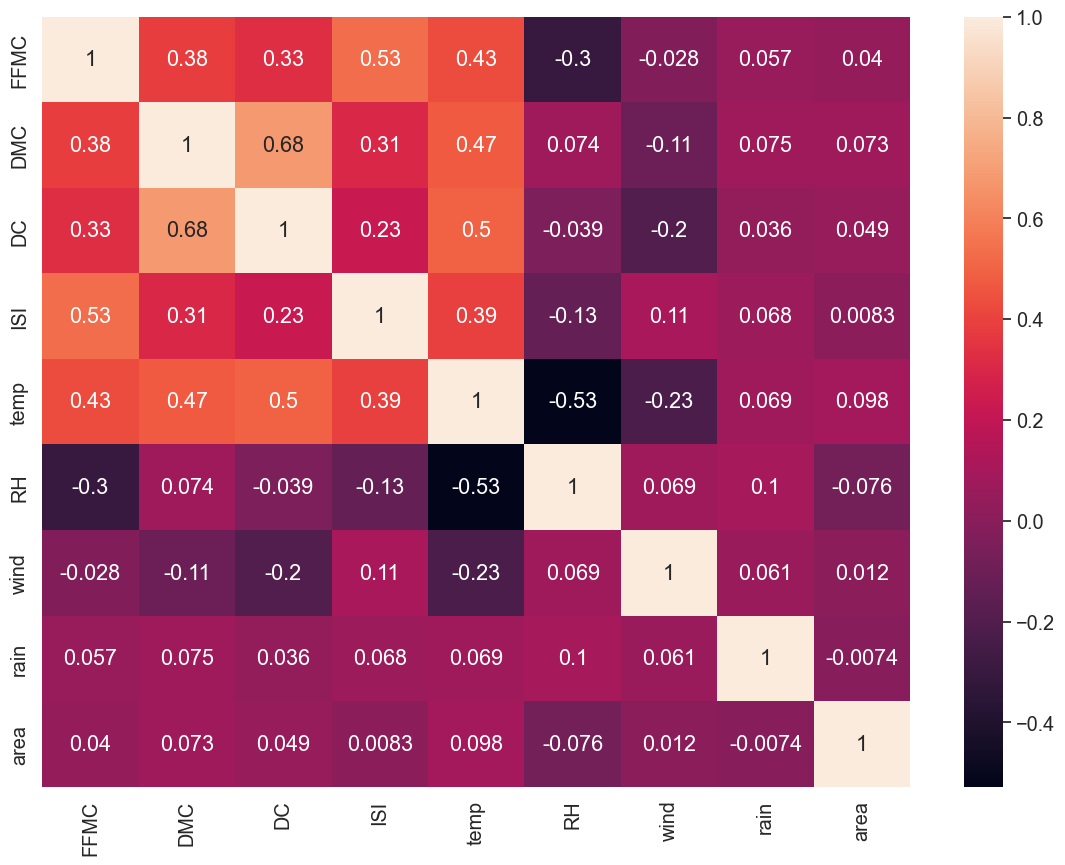

In [38]:
fig= plt.figure(figsize=(14,10))
sns.heatmap(fire_data.corr(), annot=True);
plt.xticks(rotation=90);

#### Drop duplicate value

In [39]:
fire_data1=fire_data.drop_duplicates()

In [40]:
fire_data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


#### Convert the categoricalvalues of size_category columns to ingeter

In [41]:
fire_data1["month"]=label.fit_transform(fire_data1["month"])
fire_data1["day"]=label.fit_transform(fire_data1["day"])
fire_data1["size_category"]=label.fit_transform(fire_data1["size_category"])
fire_data1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


#### Extracting the independent and dependent variables

In [42]:
x= fire_data1.iloc[:,:11]
y= fire_data1.iloc[:,-1]

#### Constructing a Sequential neural network with 11 input neurons in the first layer, 8 neurons in the hidden layer and 1 neuron in the output layer

In [43]:
model1 = Sequential()
model1.add(Dense(11,kernel_initializer='random_normal',activation='relu'))
model1.add(Dense(8,kernel_initializer='random_normal',activation='linear'))
model1.add(Dense(1,kernel_initializer='random_normal',activation='sigmoid'))

#### Compiling the model and using binary cross entropy as the loss function and adam as the weight optimizer

In [44]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fit the model

In [45]:
model1.fit(x,y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 1s 6ms/step - loss: 0.5532 - accuracy: 0.7595 - val_loss: 0.6209 - val_accuracy: 0.6845
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7683 - val_loss: 0.5918 - val_accuracy: 0.6964
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7918 - val_loss: 0.5487 - val_accuracy: 0.7202
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8240 - val_loss: 0.4859 - val_accuracy: 0.7679
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8358 - val_loss: 0.4289 - val_accuracy: 0.7976
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8534 - val_loss: 0.3846 - val_accuracy: 0.8036
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8739 - val_loss: 0.5116 - val_accuracy: 0.6607
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9912 - val_loss: 0.1586 - val_accuracy: 0.9524
Epoch 60/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9707 - val_loss: 0.2501 - val_accuracy: 0.9286
Epoch 61/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9795 - val_loss: 0.1594 - val_accuracy: 0.9345
Epoch 62/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9853 - val_loss: 0.1232 - val_accuracy: 0.9583
Epoch 63/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9971 - val_loss: 0.0752 - val_accuracy: 0.9702
Epoch 64/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0816 - val_accuracy: 0.9643
Epoch 65/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.1419 - val_accuracy: 0.9524
Epoch 

35/35 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0918 - val_accuracy: 0.9762
Epoch 117/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9762
Epoch 118/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0969 - val_accuracy: 0.9702
Epoch 119/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0990 - val_accuracy: 0.9643
Epoch 120/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1468 - val_accuracy: 0.9345
Epoch 121/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 0.9702
Epoch 122/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.1823 - val_accuracy: 0.9286
Epoch 123/150

#### Evaluate the model

In [46]:
score = model1.evaluate(x,y)
print("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9882
accuracy: 98.82%


In [47]:
history = model1.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1081 - val_accuracy: 0.9643
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1083 - val_accuracy: 0.9583
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9643
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1074 - val_accuracy: 0.9643
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1106 - val_accuracy: 0.9643
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1087 - val_accuracy: 0.9643
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1122 - val_accuracy: 0.9583
Epoch 8/150
3

35/35 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.9912 - val_loss: 0.1143 - val_accuracy: 0.9643
Epoch 59/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9853 - val_loss: 0.1162 - val_accuracy: 0.9702
Epoch 60/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1131 - val_accuracy: 0.9702
Epoch 61/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1142 - val_accuracy: 0.9702
Epoch 62/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1154 - val_accuracy: 0.9702
Epoch 63/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1220 - val_accuracy: 0.9583
Epoch 64/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1217 - val_accuracy: 0.9702
Epoch 65/150
35/35 

35/35 [==============================] - 0s 2ms/step - loss: 8.9013e-04 - accuracy: 1.0000 - val_loss: 0.1698 - val_accuracy: 0.9464
Epoch 116/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1426 - val_accuracy: 0.9524
Epoch 117/150
35/35 [==============================] - 0s 2ms/step - loss: 7.4587e-04 - accuracy: 1.0000 - val_loss: 0.1406 - val_accuracy: 0.9583
Epoch 118/150
35/35 [==============================] - 0s 2ms/step - loss: 8.2423e-04 - accuracy: 1.0000 - val_loss: 0.1405 - val_accuracy: 0.9643
Epoch 119/150
35/35 [==============================] - 0s 2ms/step - loss: 9.3573e-04 - accuracy: 1.0000 - val_loss: 0.1418 - val_accuracy: 0.9583
Epoch 120/150
35/35 [==============================] - 0s 2ms/step - loss: 7.1240e-04 - accuracy: 1.0000 - val_loss: 0.1405 - val_accuracy: 0.9702
Epoch 121/150
35/35 [==============================] - 0s 2ms/step - loss: 6.8176e-04 - accuracy: 1.0000 - val_loss: 0.1448 - val_accura

#### List all data in history

In [48]:
model1.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Summarize history for accuracy

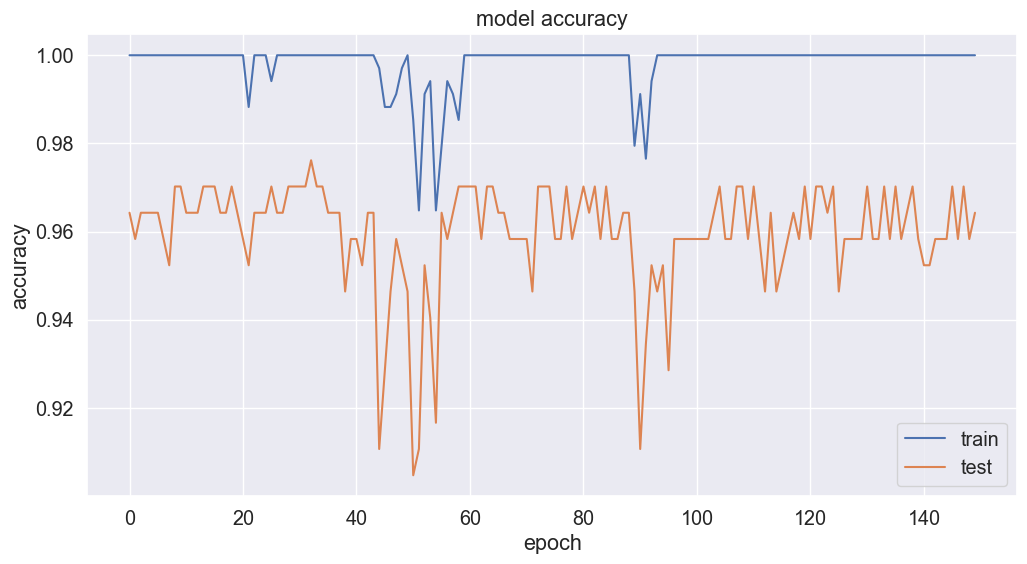

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#### Summarize history for loss

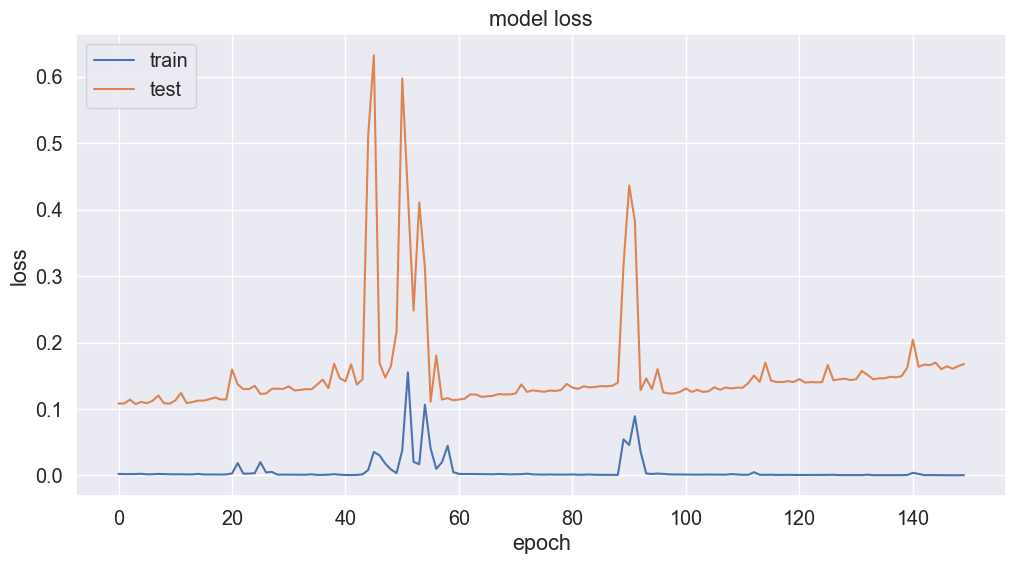

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion:

###  The neural network helps classifying the burnt forest areas with a highest evaluation accuracy of 98.82% and with a minimal loss of 0.0382%.